In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import pickle

import seaborn as sns
sns.set()
from matplotlib import style
style.use('ggplot')

In [2]:
prices = pd.read_csv('./data/historical_stock_prices.csv')
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
ticker       object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume       int64
date         object
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ GB


In [3]:
symbols = pd.read_csv('./data/historical_stocks.csv')
symbols

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS
...,...,...,...,...,...
6455,ZOES,NYSE,"ZOE&#39;S KITCHEN, INC.",CONSUMER SERVICES,RESTAURANTS
6456,ZTS,NYSE,ZOETIS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS
6457,ZTO,NYSE,ZTO EXPRESS (CAYMAN) INC.,TRANSPORTATION,TRUCKING FREIGHT/COURIER SERVICES
6458,ZUO,NYSE,"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE


In [4]:
with open('data/sp500tickers.pickle', 'rb') as f:
    tickers = pickle.load(f)
len(tickers)

505

In [5]:
# prices.head()
symbols

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS
...,...,...,...,...,...
6455,ZOES,NYSE,"ZOE&#39;S KITCHEN, INC.",CONSUMER SERVICES,RESTAURANTS
6456,ZTS,NYSE,ZOETIS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS
6457,ZTO,NYSE,ZTO EXPRESS (CAYMAN) INC.,TRANSPORTATION,TRUCKING FREIGHT/COURIER SERVICES
6458,ZUO,NYSE,"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE


In [6]:
prices = prices.loc[prices.date >='2013-01-01']
# prices = prices.loc[prices.ticker.isin(tickers)]
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6671799 entries, 0 to 20973888
Data columns (total 8 columns):
ticker       object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume       int64
date         object
dtypes: float64(5), int64(1), object(2)
memory usage: 458.1+ MB


In [7]:
tickers_all = sorted(prices.ticker.unique())
len(tickers_all)

5685

In [8]:
prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [3]:
# df_all = pd.DataFrame()
# for i, ticker in enumerate(tickers_all):
#     df = prices.loc[prices.ticker==ticker]
#     df.set_index('date', inplace=True)
#     df = df.rename(columns={'adj_close': ticker})
#     df = df[[ticker]]
#     if df_all.empty:
#         df_all = df
#     else:
#         df_all = df_all.join(df, how='outer')
#     if i % 100 == 0:
#         print(i)

In [9]:
df_all.to_csv('all_closes_2013.csv')

In [10]:
# df_sp500 = pd.DataFrame()
# for i, ticker in enumerate(tickers):
#     df = prices.loc[prices.ticker==ticker]
#     df.set_index('date', inplace=True)
#     df = df.rename(columns={'adj_close': ticker})
#     df = df[[ticker]]
#     if df_sp500.empty:
#         df_sp500 = df
#     else:
#         df_sp500 = df_sp500.join(df, how='outer')
#     if i % 10 == 0:
#         print(i)

In [ ]:
# import os
# def get_data_from_yahoo(reload_sp500=False):
#     if reload_sp500:
#         tickers = save_sp500_tickers()
#     else:
#         with open('data/sp500tickers.pickle', 'rb') as f:
#             tickers = pickle.load(f)
#     sd = dt.datetime(2013, 1, 1)
#     ed = dt.datetime.now()
#     for ticker in tickers:
#         if not os.path.exists('data/stock_dfs'):
#             os.makedirs('data/stock_dfs')
#         if not os.path.exists('data/stock_dfs/{}.csv'.format(ticker)):
#             try:
#                 df = web.DataReader(ticker, 'yahoo', sd, ed)
#                 df.to_csv('data/stock_dfs/{}.csv'.format(ticker))
#             except Exception as e:
#                 print(ticker, e)
#         else:
#             print('{} df exists'.format(ticker))
# get_data_from_yahoo()

In [11]:
# def compile_data():
#     with open('data/sp500tickers.pickle', 'rb') as f:
#         tickers = pickle.load(f)
#     results = pd.DataFrame()
#     for i, ticker in enumerate(tickers):
#         try:
#             df = pd.read_csv('data/stock_dfs/{}.csv'.format(ticker))
#             df.set_index('Date', inplace=True)
# #             df['{}_HL_pct_diff'.format(ticker)] = (df['High'] - df['Low']) / df['Low']
# #             df['{}_daily_pct_chng'.format(ticker)] = (df['Close'] - df['Open']) / df['Open']
#             df.rename(columns={'Adj Close': ticker}, inplace=True)
#             df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
#             if results.empty:
#                 results = df
#             else:
#                 results = results.join(df, how='outer')
#         except Exception as e:
#             print(ticker, e)
#         if i % 10 == 0:
#             print(i)
# #     print(results.head())
#     results.to_csv('sp500_closes.csv')
    
# compile_data()

In [28]:
# prices = prices.dropna(axis=1, how='all')
# prices.head()
# sum(prices.ZYME.isna())

In [10]:
# prices = df_sp500
# prices = df_all.copy()
# prices = prices.reset_index()
prices = pd.read_csv('all_closes_2013.csv')
prices.tail()

,date,A,AA,AABA,AAC,AAL,AAME,AAN,AAOI,AAON,...,ZOES,ZS,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZUO,ZYME,ZYNE
1418,2018-08-20,64.470001,41.830002,69.260002,9.79,39.990002,2.55,49.470001,40.270000,42.150002,...,12.87,39.820000,3.97,19.91,11.92,92.160004,29.50,28.299999,13.67,6.13
1419,2018-08-21,64.930000,43.029999,70.250000,9.71,40.330002,2.55,50.169998,40.610001,42.750000,...,13.35,39.430000,3.96,19.98,11.93,92.089996,29.90,28.799999,14.11,6.31
1420,2018-08-22,65.650002,43.220001,70.320000,9.70,39.189999,2.65,50.790001,41.830002,42.900002,...,13.30,41.720001,4.08,19.15,11.95,89.669998,29.90,29.719999,13.89,6.26
1421,2018-08-23,65.690002,42.020000,68.220001,9.76,38.830002,2.60,50.849998,42.790001,41.349998,...,13.42,42.549999,4.09,19.25,11.95,89.669998,30.00,30.170000,13.90,6.30
1422,2018-08-24,65.980003,43.439999,68.900002,9.50,38.820000,2.70,50.490002,42.869999,41.349998,...,13.37,44.430000,4.04,19.52,11.94,89.599998,29.75,33.380001,13.79,6.30


In [16]:
prices = pd.read_csv('sp500_closes.csv')
prices.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,2013-01-02,79.758415,27.926201,27.193508,13.69,59.578766,10.310681,38.340000,2.53,71.585838,...,78.928162,97.898666,21.486698,15.530575,31.753428,24.999222,42.287354,63.767414,20.332291,NaN
1,2013-01-03,79.665848,28.989225,26.968964,13.45,59.363071,10.367179,37.750000,2.49,71.585838,...,79.734497,98.951675,21.423912,15.530575,31.693514,24.917400,42.551826,64.681076,20.360031,NaN
2,2013-01-04,80.254913,28.814959,26.628265,13.41,59.690914,10.517838,38.130001,2.59,72.701752,...,79.711494,100.145653,21.502390,15.357772,31.248316,24.881042,43.017757,65.010742,20.942539,NaN
3,2013-01-07,80.355881,29.050213,26.682472,13.25,59.432095,10.527254,37.939999,2.67,72.454865,...,79.481110,100.485619,21.274820,15.616977,31.119894,24.553778,42.746994,65.170853,20.840830,NaN
4,2013-01-08,80.364304,29.058924,26.101748,13.21,59.777180,10.348347,38.139999,2.67,71.269798,...,79.089447,100.402710,21.314045,15.595379,30.486374,24.253788,40.952507,65.265068,20.424749,NaN


In [17]:
prices.T.head().iloc[0]

0       2013-01-02
1       2013-01-03
2       2013-01-04
3       2013-01-07
4       2013-01-08
           ...    
1700    2019-10-03
1701    2019-10-04
1702    2019-10-07
1703    2019-10-08
1704    2019-10-09
Name: Date, Length: 1705, dtype: object

In [18]:
df = prices.T
header = df.iloc[0]
df = df[1:].rename(columns=header)
df = df.reset_index()
df.head()

,index,2013-01-02,2013-01-03,2013-01-04,2013-01-07,2013-01-08,2013-01-09,2013-01-10,2013-01-11,2013-01-14,...,2019-09-26,2019-09-27,2019-09-30,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-07,2019-10-08,2019-10-09
0,MMM,79.7584,79.6658,80.2549,80.3559,80.3643,81.1301,81.534,81.0207,81.6939,...,163.83,164.53,164.4,158.38,155.65,155.23,155.82,153.52,150.74,NaN
1,ABT,27.9262,28.9892,28.815,29.0502,29.0589,29.2506,29.4946,29.1971,29.1884,...,82.66,81.84,83.67,81.84,79.53,81.07,81.99,81.04,78.51,NaN
2,ABBV,27.1935,26.969,26.6283,26.6825,26.1017,26.2489,26.3263,26.5222,26.7102,...,74.03,74.85,75.72,73.23,72.13,73.85,74.66,74.33,73.53,NaN
3,ABMD,13.69,13.45,13.41,13.25,13.21,12.84,12.8,12.25,12.32,...,177.65,175.89,177.89,170.21,163.39,167.03,169.25,164.43,159.49,NaN
4,ACN,59.5788,59.3631,59.6909,59.4321,59.7772,60.1999,59.6737,60.2862,60.2689,...,192.12,191.38,192.35,189.62,184.85,185.81,189.64,186.81,182.2,NaN


In [23]:
symbols = pd.read_csv('./data/historical_stocks.csv')
for ticker in df['index']:
    if not ticker in symbols.ticker.unique():
        print(ticker)

AMCR
CPRI
CTVA
DOW
DD
EVRG
GL
LHX
LIN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5685 entries, 0 to 5684
Columns: 1424 entries, index to 2018-08-24
dtypes: object(1424)
memory usage: 61.8+ MB


In [8]:
data_start_date = df.columns[1]
data_end_date = df.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2013-01-02 to 2018-08-24


In [9]:
dates = df.columns[1:]
dates[len(dates)-1]

'2018-08-24'

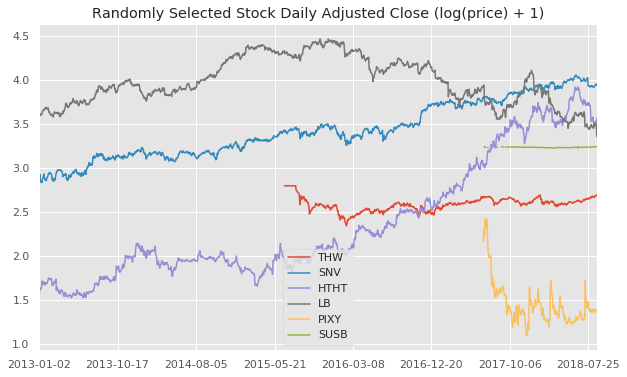

In [11]:
def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=66)
    tickers = sample['index'].tolist()
    series_samples = sample.loc[:,data_start_date:data_end_date]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
#         pd.Series(series_samples.iloc[i]).astype(np.float64).plot(linewidth=1.5)
    
    plt.title('Randomly Selected Stock Daily Adjusted Close (log(price) + 1)')
    plt.legend(tickers)
    
plot_random_series(df, 6)

In [12]:
prices[['AAPL']]

,AAPL
0,56.118870
1,55.410530
2,53.867073
3,53.550209
4,53.694336
...,...
1418,215.460007
1419,215.039993
1420,215.050003
1421,215.490005


In [13]:
pred_steps = 14
data_start_date, data_end_date

val_pred_start = dates[len(dates) - pred_steps]
val_pred_end = dates[len(dates) - 1]

train_pred_start = dates[len(dates) - 2*pred_steps]
train_pred_end = dates[len(dates) - pred_steps - 1]

enc_length = len(dates) - 2 * pred_steps
train_enc_start = dates[0]
train_enc_end = dates[enc_length - 1]

val_enc_start = dates[pred_steps]
val_enc_end = dates[pred_steps + enc_length - 1]

In [34]:
# from datetime import timedelta

# pred_steps = 60 
# pred_length=timedelta(pred_stepsa)

# first_day = pd.to_datetime(data_start_date) 
# last_day = pd.to_datetime(data_end_date)

# val_pred_start = last_day - pred_length + timedelta(1)
# val_pred_end = last_day

# train_pred_start = val_pred_start - pred_length
# train_pred_end = val_pred_start - timedelta(days=1)

In [35]:
# enc_length = train_pred_start - first_day

# train_enc_start = first_day
# train_enc_end = train_enc_start + enc_length - timedelta(1)

# val_enc_start = train_enc_start + pred_length
# val_enc_end = val_enc_start + enc_length - timedelta(1)

In [14]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

# print('\nEncoding interval:', enc_length.days)
# print('Prediction interval:', pred_length.days)

Train encoding: 2013-01-02 - 2018-07-17
Train prediction: 2018-07-18 - 2018-08-06 

Val encoding: 2013-01-23 - 2018-08-06
Val prediction: 2018-08-07 - 2018-08-24


In [15]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = np.array(df[df.columns[1:]].values, dtype=np.float)

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [16]:
# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

print(encoder_input_data.shape, encode_series_mean.shape, decoder_target_data.shape)

(5685, 1395, 1) (5685, 1) (5685, 14, 1)


In [35]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam
from keras import optimizers

In [18]:
# # convolutional layer parameters
# n_filters = 32 
# filter_width = 2
# dilation_rates = [2**i for i in range(8)] 

# # define an input history series and pass it through a stack of dilated causal convolutions. 
# history_seq = Input(shape=(None, 1))
# x = history_seq

# for dilation_rate in dilation_rates:
#     x = Conv1D(filters=n_filters,
#                kernel_size=filter_width, 
#                padding='causal',
#                dilation_rate=dilation_rate)(x)

# x = Dense(128, activation='relu')(x)
# x = Dropout(.2)(x)
# x = Dense(1)(x)

# # extract the last 14 time steps as the training target
# def slice(x, seq_length):
#     return x[:,-seq_length:,:]

# pred_seq_train = Lambda(slice, arguments={'seq_length':pred_steps})(x)

# model = Model(history_seq, pred_seq_train)
# model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          2080      
_____________________________________________________

In [36]:
# convolutional operation parameters
n_filters = 32 # 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(16, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(16, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':pred_steps})(out)

model = Model(history_seq, pred_seq_train)
model.compile(Adam(), loss='mean_absolute_error')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_75 (Conv1D)              (None, None, 16)     32          input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_76 (Conv1D)              (None, None, 32)     1056        conv1d_75[0][0]                  
__________________________________________________________________________________________________
conv1d_77 (Conv1D)              (None, None, 32)     1056        conv1d_75[0][0]                  
____________________________________________________________________________________________

In [37]:
encoder_input_data.shape, decoder_target_data.shape

((5685, 1395, 1), (5685, 14, 1))

In [38]:
# first_n_samples = 120000
batch_size = 2**10
epochs = 10

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Train on 5116 samples, validate on 569 samples
Epoch 1/10
5116/5116 [==============================] - 11s 2ms/step - loss: 0.5022 - val_loss: 0.2916
Epoch 2/10
5116/5116 [==============================] - 5s 978us/step - loss: 0.2726 - val_loss: 0.1929
Epoch 3/10
5116/5116 [==============================] - 5s 975us/step - loss: 0.2323 - val_loss: 0.1214
Epoch 4/10
5116/5116 [==============================] - 5s 976us/step - loss: 0.2343 - val_loss: 0.1738
Epoch 5/10
5116/5116 [==============================] - 5s 974us/step - loss: 0.2220 - val_loss: 0.1176
Epoch 6/10
5116/5116 [==============================] - 5s 975us/step - loss: 0.2165 - val_loss: 0.1925
Epoch 7/10
5116/5116 [==============================] - 5s 975us/step - loss: 0.2215 - val_loss: 0.1188
Epoch 8/10
5116/5116 [==============================] - 5s 977us/step - loss: 0.2160 - val_loss: 0.1839
Epoch 9/10
5116/5116 [==============================] - 5s 976us/step - loss: 0.2211 - val_loss: 0.1827
Epoch 10/10
5116/5

In [40]:
sgd = optimizers.Adam(lr=1e-2)#, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Train on 5116 samples, validate on 569 samples
Epoch 1/10
5116/5116 [==============================] - 11s 2ms/step - loss: 0.1745 - val_loss: 0.1008
Epoch 2/10
5116/5116 [==============================] - 5s 1ms/step - loss: 0.1206 - val_loss: 0.0806
Epoch 3/10
5116/5116 [==============================] - 5s 1ms/step - loss: 0.1118 - val_loss: 0.0769
Epoch 4/10
5116/5116 [==============================] - 5s 1ms/step - loss: 0.1097 - val_loss: 0.0803
Epoch 5/10
5116/5116 [==============================] - 5s 1ms/step - loss: 0.1096 - val_loss: 0.0817
Epoch 6/10
5116/5116 [==============================] - 5s 995us/step - loss: 0.1083 - val_loss: 0.0793
Epoch 7/10
5116/5116 [==============================] - 5s 997us/step - loss: 0.1072 - val_loss: 0.0763
Epoch 8/10
5116/5116 [==============================] - 5s 999us/step - loss: 0.1082 - val_loss: 0.0848
Epoch 9/10
5116/5116 [==============================] - 5s 1ms/step - loss: 0.1068 - val_loss: 0.0780
Epoch 10/10
5116/5116 [=====

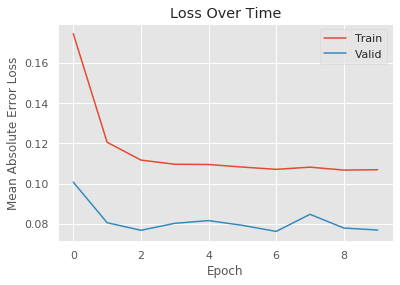

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [42]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [43]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [44]:
encoder_input_data.shape, decoder_target_data.shape

((5685, 1395, 1), (5685, 14, 1))

In [45]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

/nfs_shares/xzw0005_home/conda_envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


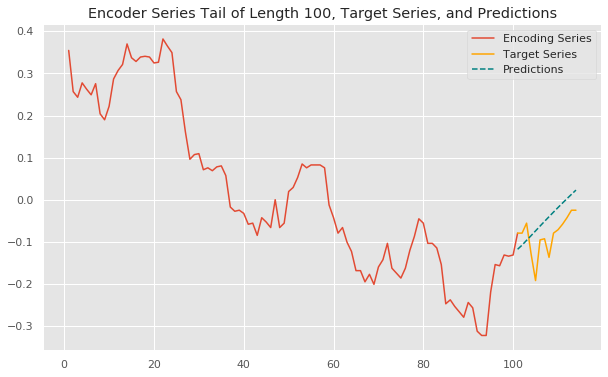

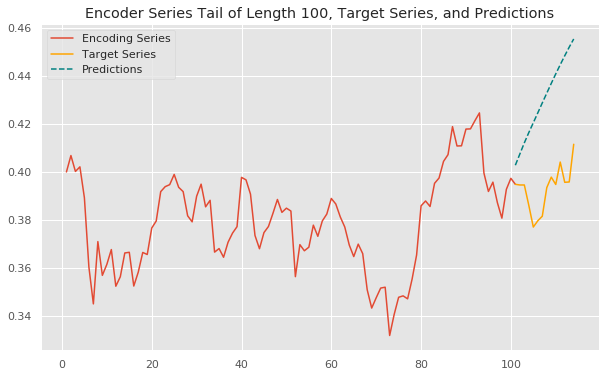

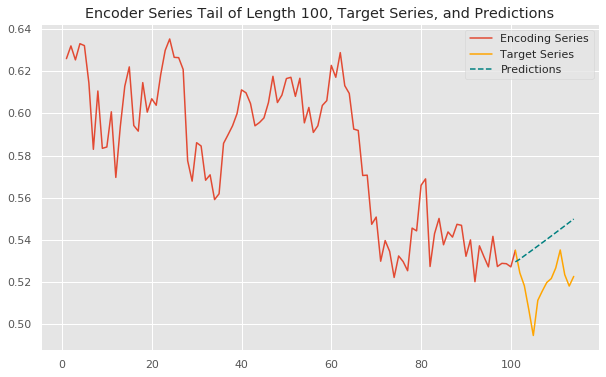

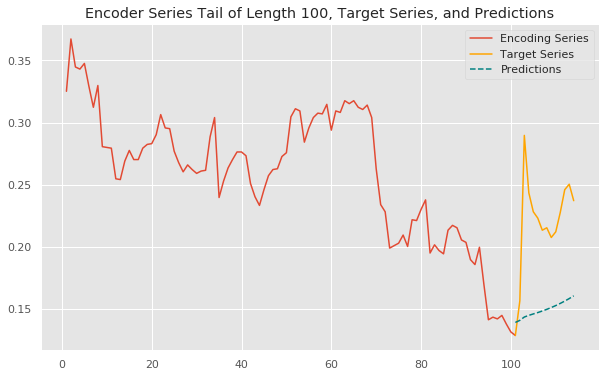

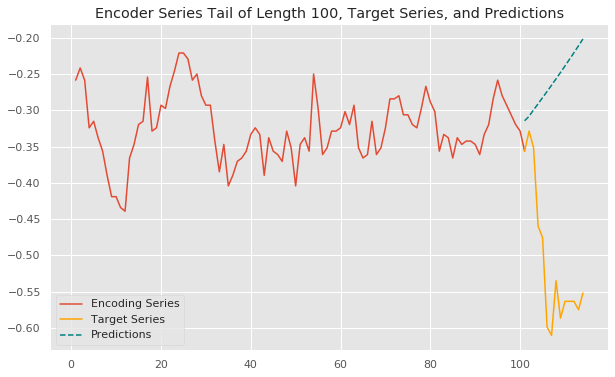

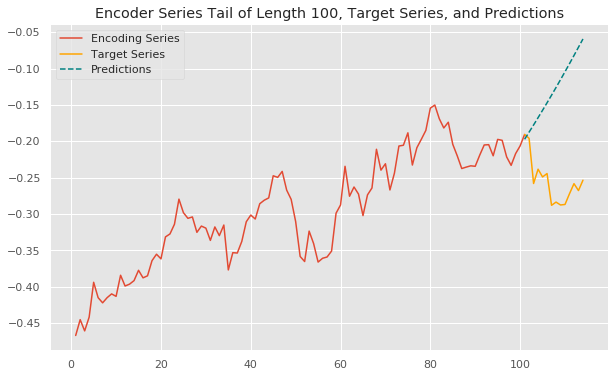

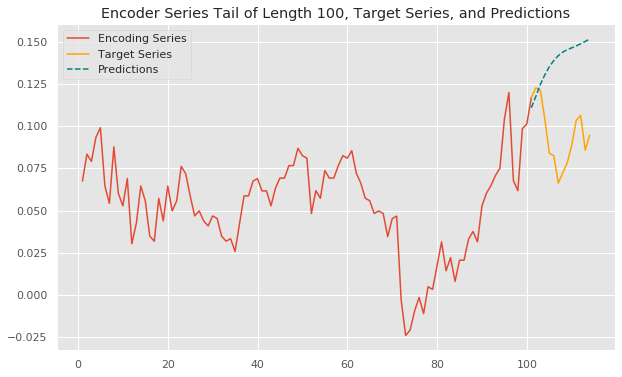

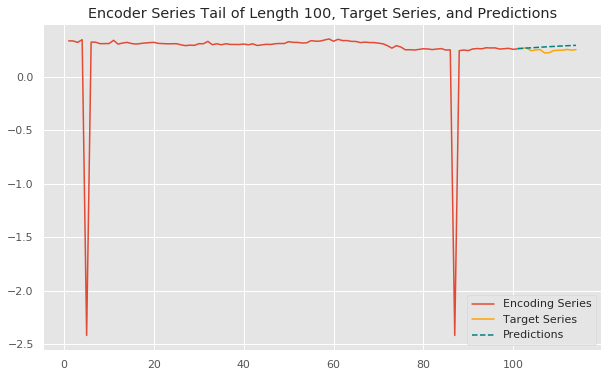

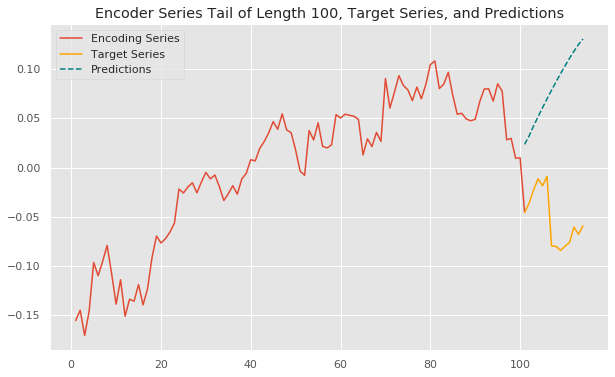

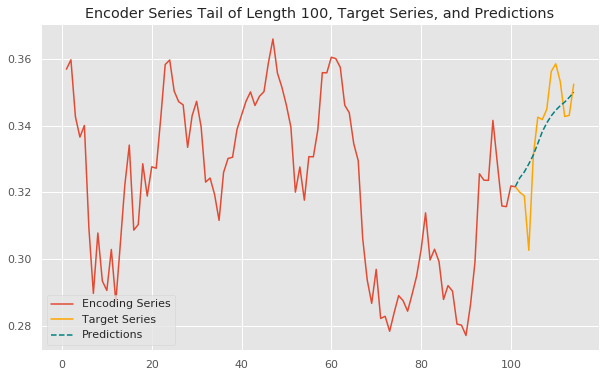

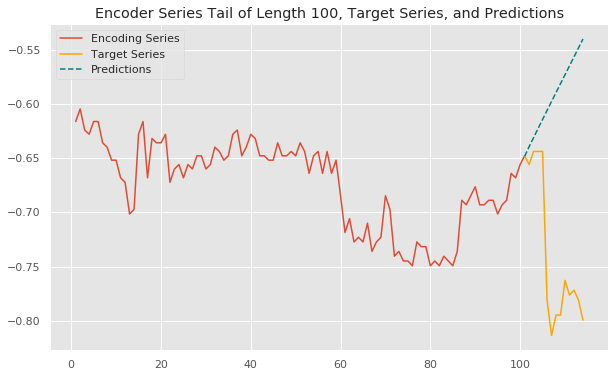

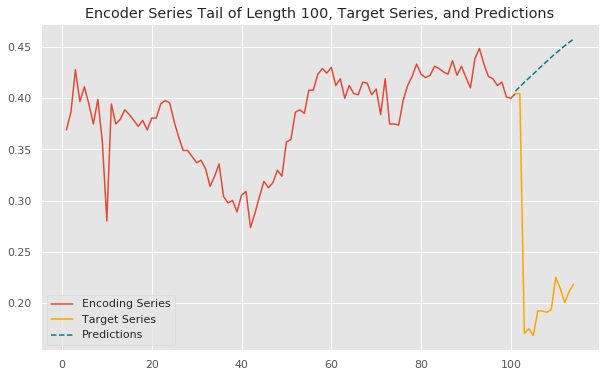

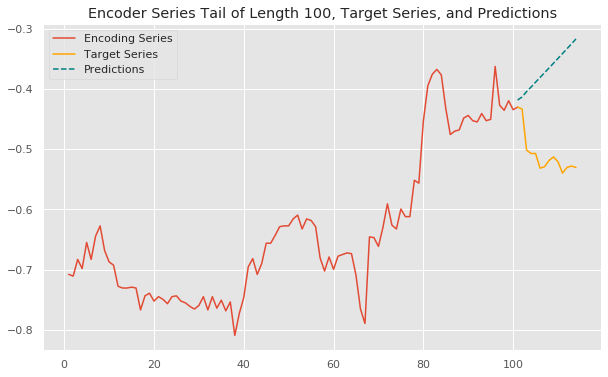

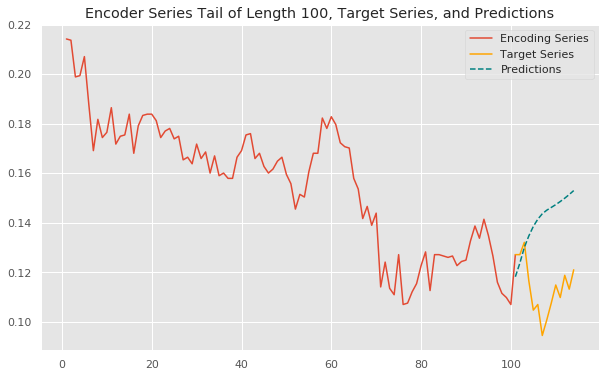

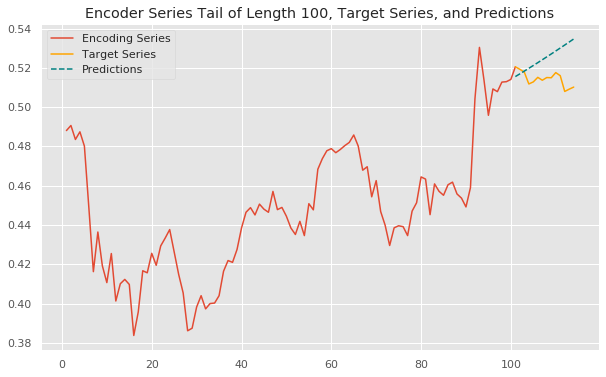

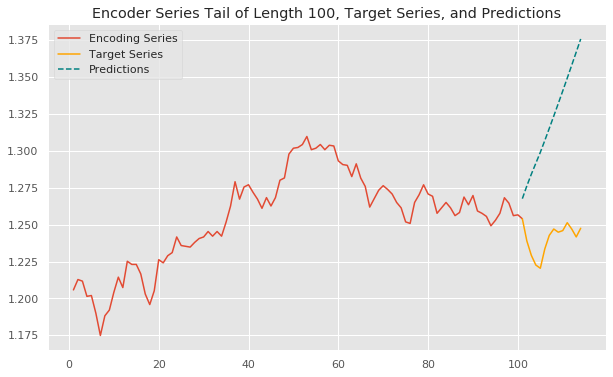

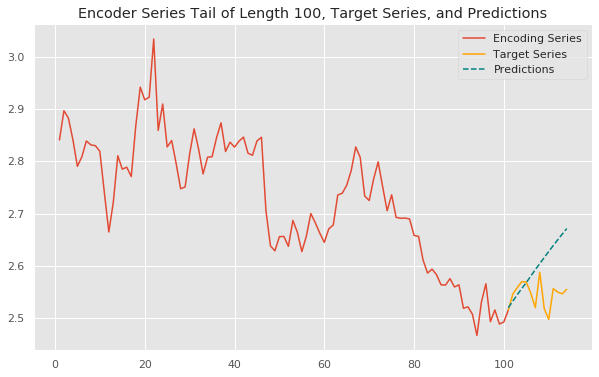

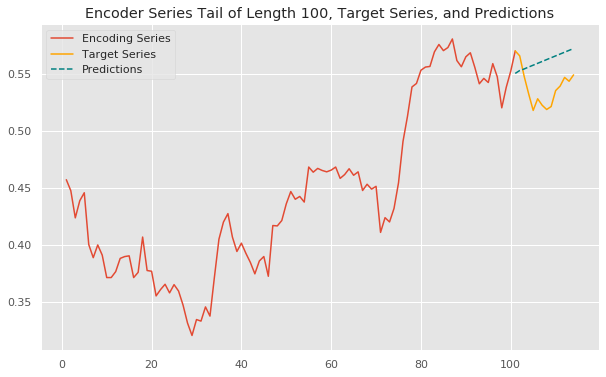

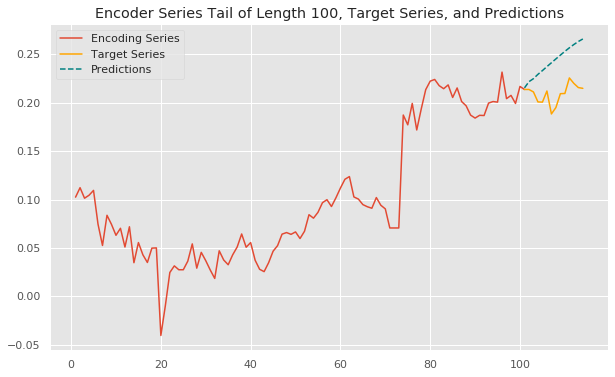

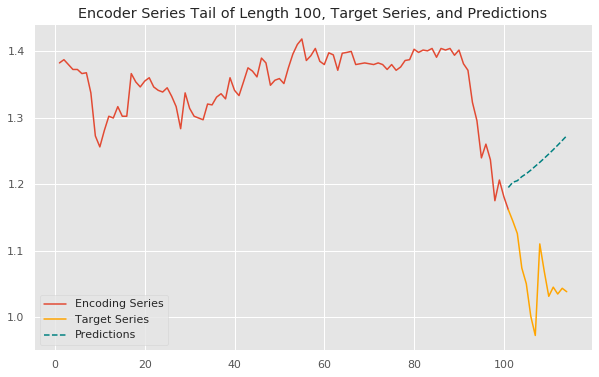

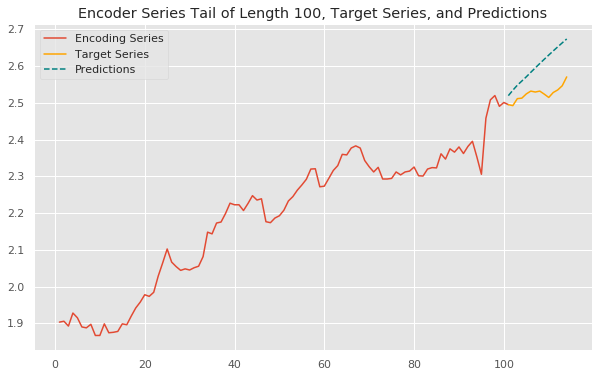

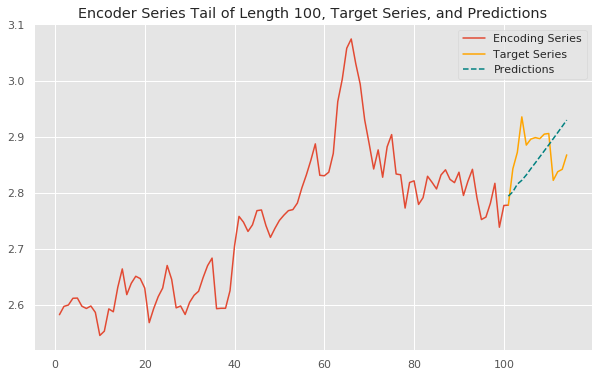

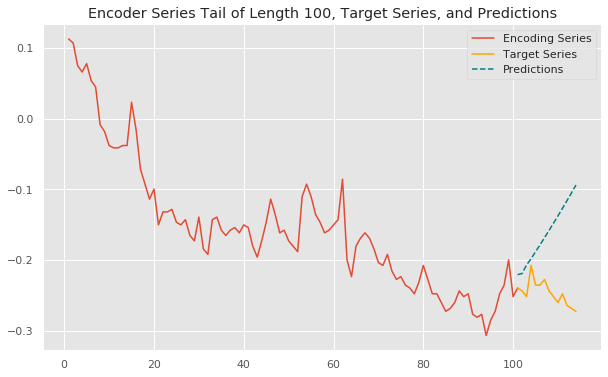

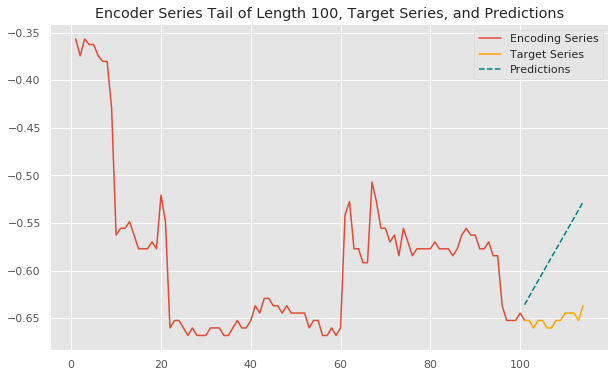

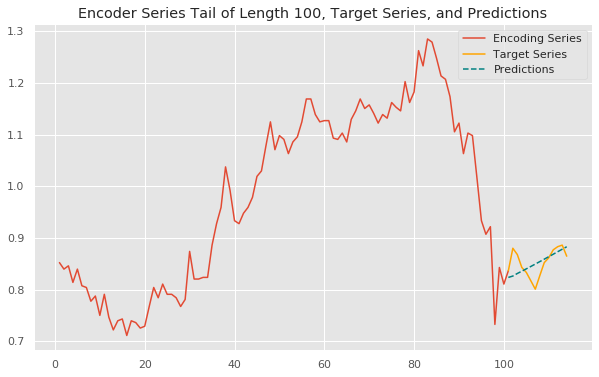

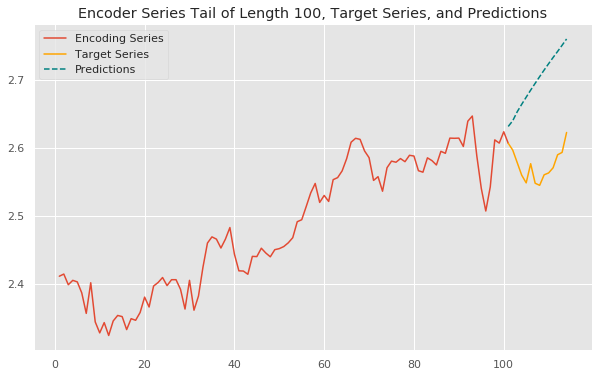

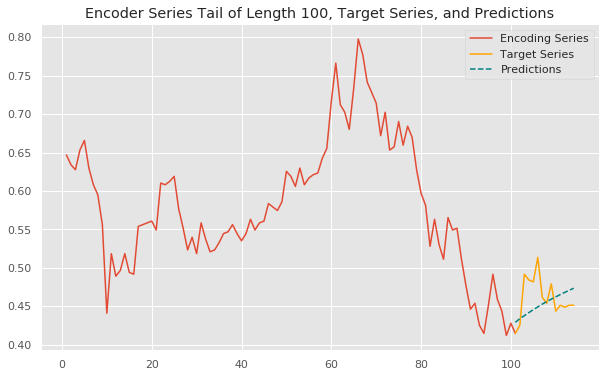

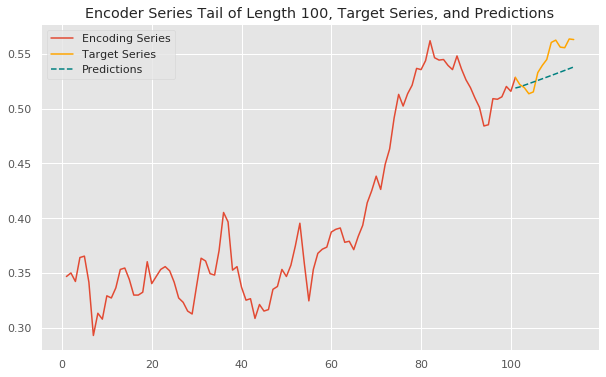

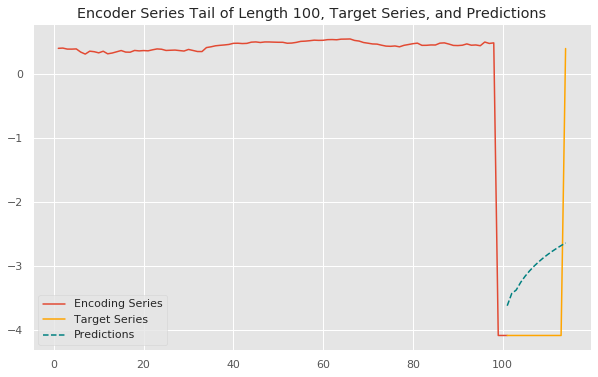

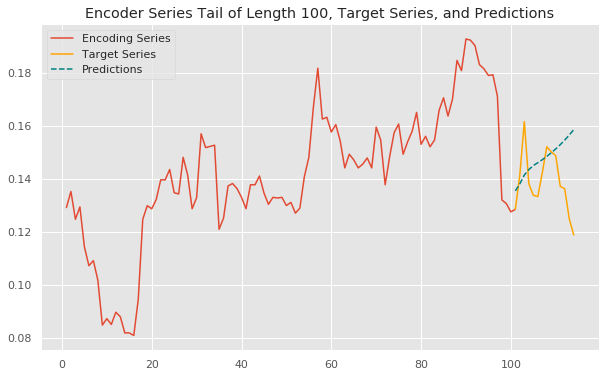

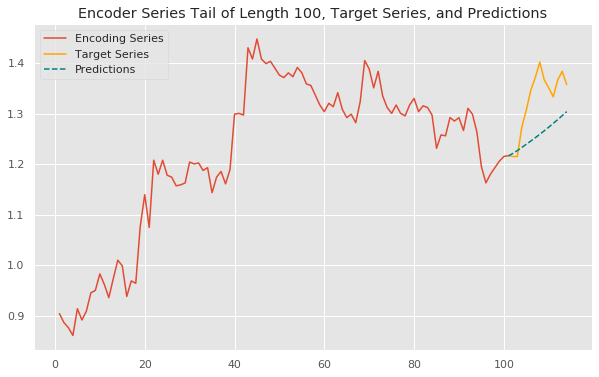

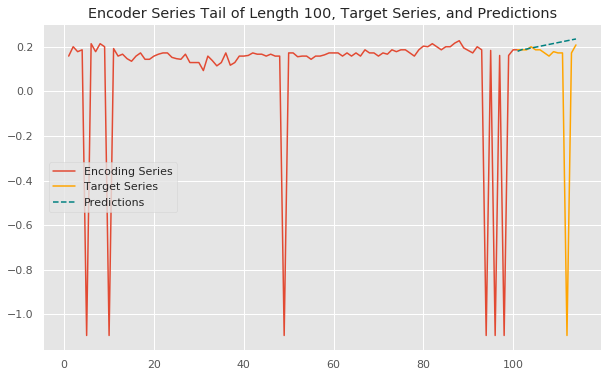

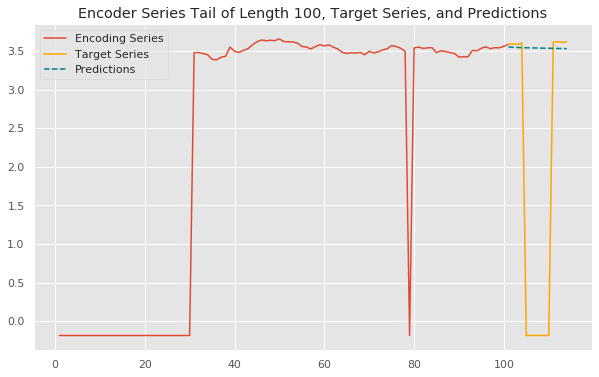

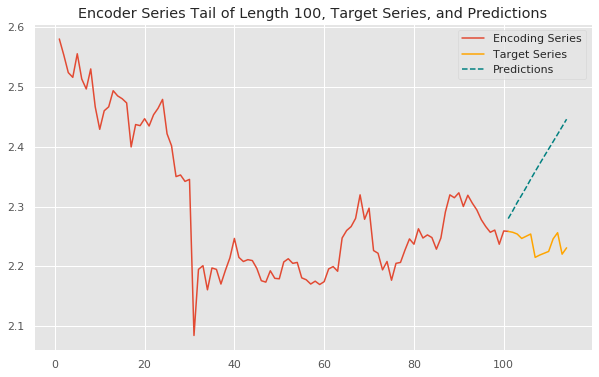

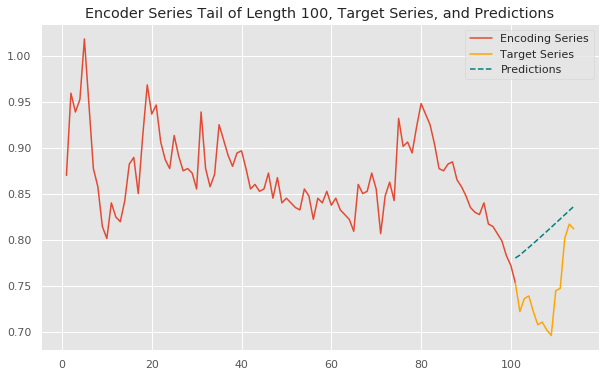

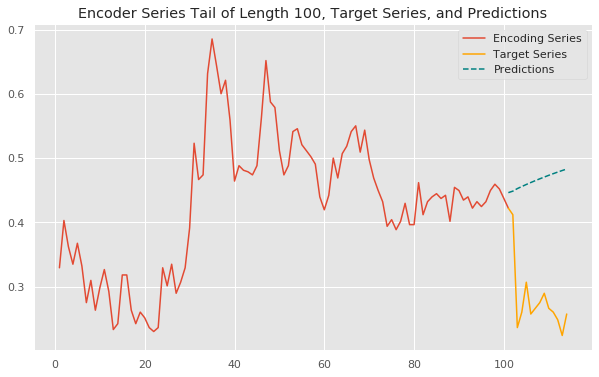

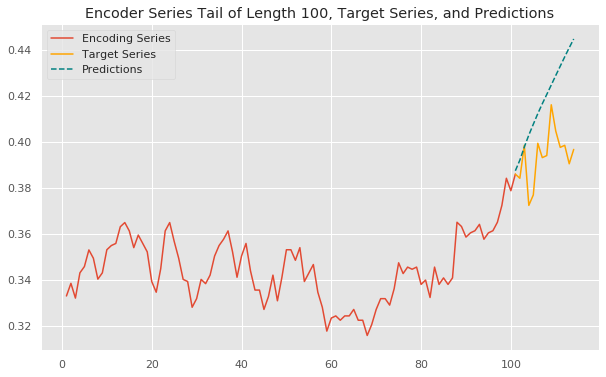

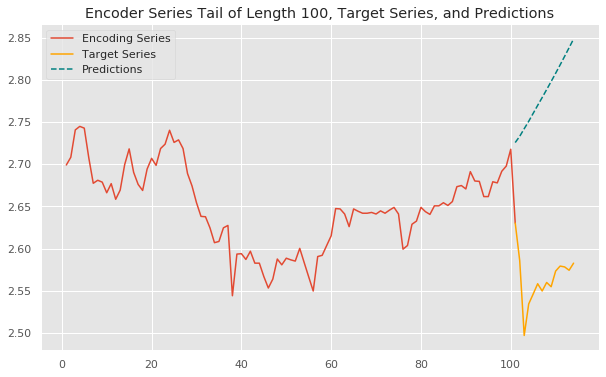

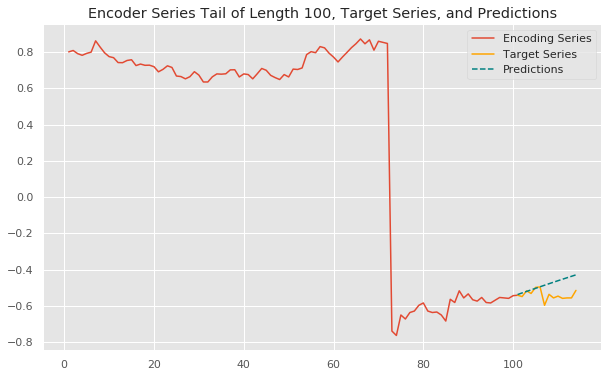

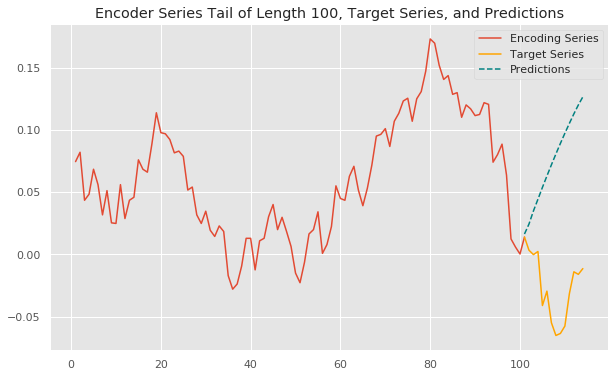

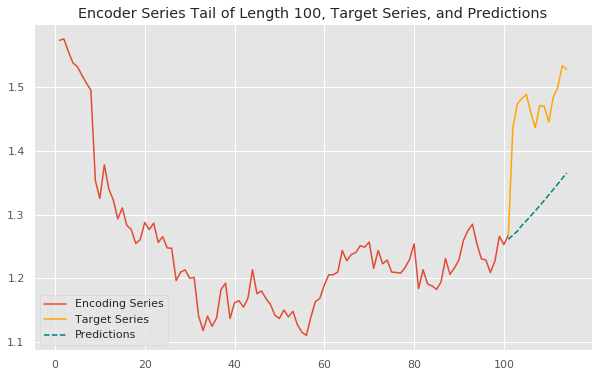

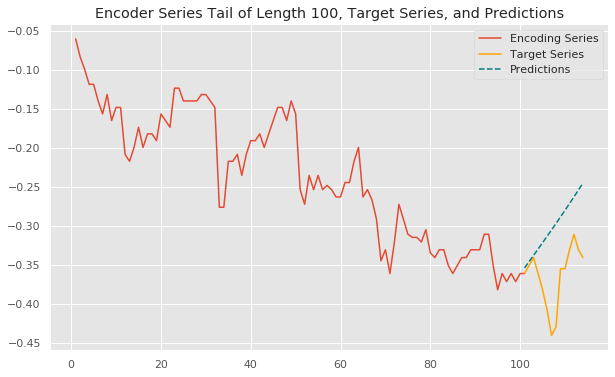

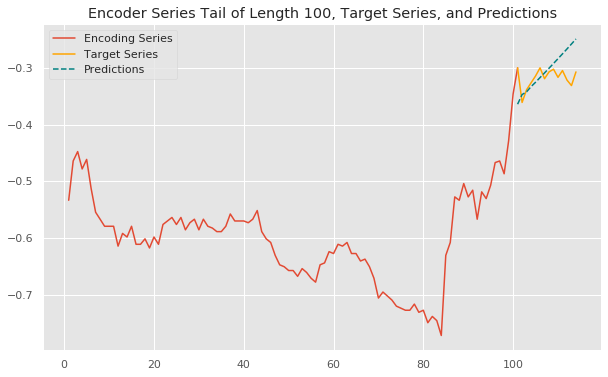

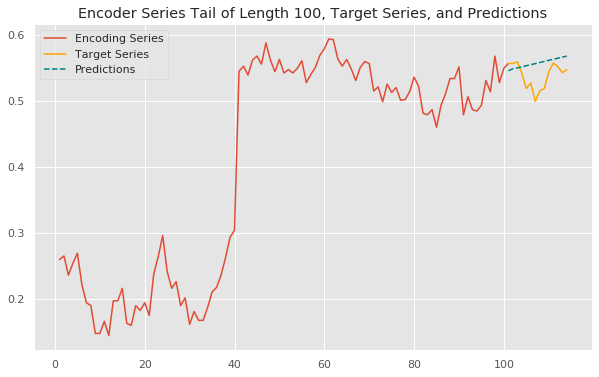

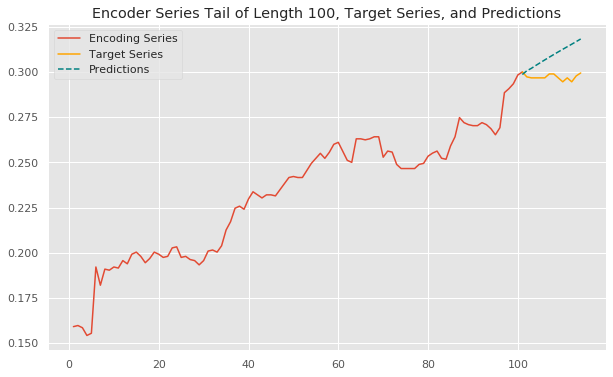

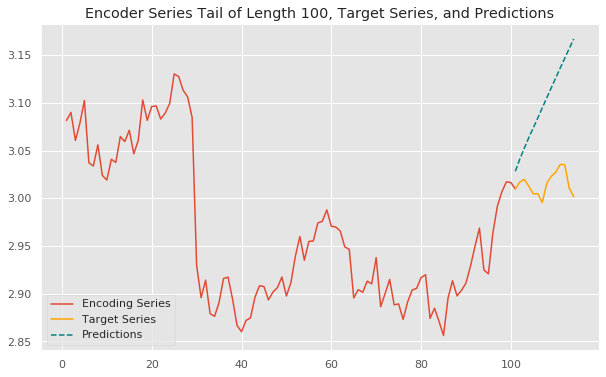

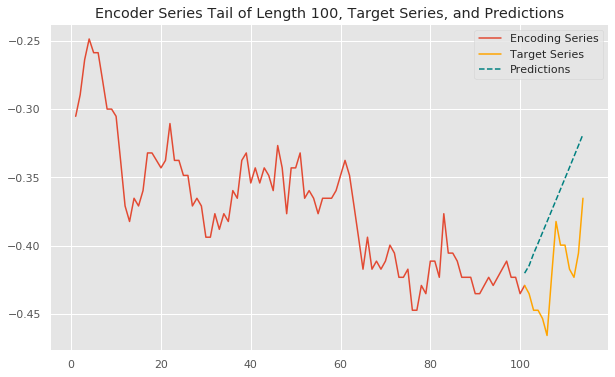

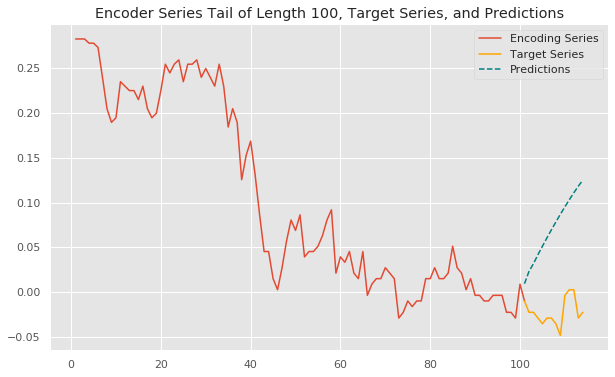

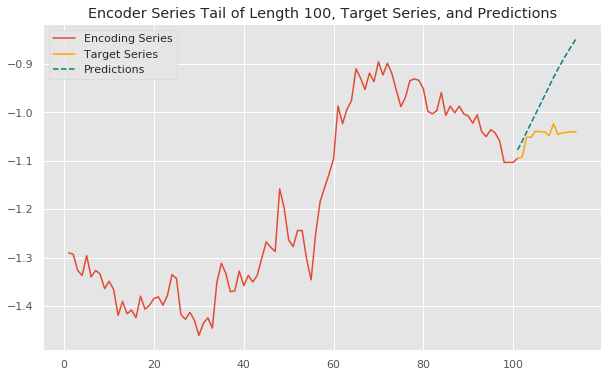

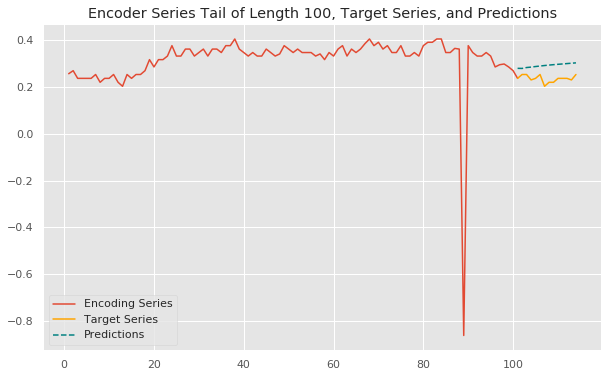

In [48]:
for i in range(50):
    predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=i+300, enc_tail_len=100)

In [30]:
tickers.index('GOOG')

NameError: name 'tickers' is not defined